<a href="https://colab.research.google.com/github/keval47/Machine-Learning/blob/master/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

In [200]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/insurance_data.csv')
df.head(2)

,age,bought_insurance
0,22,0
1,25,0


In [0]:
X = np.array(df.iloc[:,0])
Y = np.array(df.iloc[:,1])
mean = np.mean(X)
std = np.std(X)
# X =  ( (X-min(X))/(max(X)-min(X)) ) * ( (1-0)+0 )
X = (X - mean) / std
ones = np.ones((len(X),1),dtype=int)
X = np.concatenate((ones,X[:,None]),axis=1)

In [0]:
def cost_function(x,y,w):
  h = np.dot(x,w)
  h = sigmoid(h)
  h = np.sum(( (y * np.log(h)) + ((1 - y) * np.log(1 - h)) ))
  return -(h/len(y))

In [0]:
def gradient_decent(x,y,theta,lr,iters):
  err = list()
  for i in range(iters):
    theta = gradient_step(x,y,theta,lr)
    err.append(cost_function(x,y,theta))
  return theta,err

In [0]:
def gradient_step(x,y,w,lr):
  m = len(y)
  pred = sigmoid(np.dot(x,w))
  pred = pred - y
  deriv = np.sum((pred[:,None]*x),axis=0)
  w = w - ( (lr * (1/m)) * deriv)
  return w

In [0]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [0]:
#hyper parameters
lr = 0.1
iters = 400
theta = np.zeros(X.shape[1])

In [241]:
theta,err = gradient_decent(X,Y,theta,lr,iters)
min(err)

0.37795836103703284

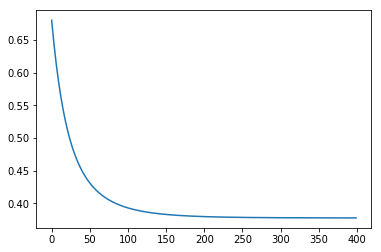

In [242]:
plt.plot(err)

In [0]:
def predict(x,theta,mean,std):
#   val =  ( (val-min(val))/(max(val)-min(val)) ) * ( (1-0)+0 )
  ret = list()
  for i in range(len(x)):
    bit = x[i]
    bit = np.array((bit - mean) / std)
    bit = np.insert(bit,0,1)
    pred = sigmoid(np.sum(bit*theta))
    if(pred >= 0.5):
      ret.append(1)
    else:
      ret.append(0)
  return ret

In [0]:
def predict_prob(x,theta,mean,std):
#   val =  ( (val-min(val))/(max(val)-min(val)) ) * ( (1-0)+0 )
  ret = list()
  for i in range(len(x)):
    bit = x[i]
    bit = np.array((bit - mean) / std)
    bit = np.insert(bit,0,1)
    pred = sigmoid(np.sum(bit*theta))
    ret.append(str(int(round(pred, 2)*100))+'%')
  return ret

In [0]:
test = predict(df['age'],theta,mean,std)
test